In [1]:
#First need to make sure custom modules in oo_source are in Python Path
import sys
from pathlib import Path
sys.path.insert(1, str(Path.home())+'/canonical_vorticity_probe/oo_source')

import mst_mach_tools as mmt
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d
import MDSplus as mds
import pandas as pd
import numpy as np

import ProbeDictionaries_FullTetra
from ProbeDictionaries_FullTetra import MachProbeDict

# Probe alignment Shot 1231108003

In [3]:
A=np.degrees(np.arctan((0.186/50)/(0.34/20)))
B=np.degrees(np.arctan((0.266/50)/(0.27/20)))
A, B, np.mean([A,B])

(12.343107752638103, 21.50811397032935, 16.925610861483726)

# Probe alignment Shot 1231108004

In [4]:
P3=np.degrees(np.arctan((0.33/50)/(0.32/20)))
P4=np.degrees(np.arctan((0.06/50)/(0.28/20)))
P3, P4, np.mean([P3,P4])

(22.416147479343643, 4.899092453787764, 13.657619966565704)

# Probe alignment Shot 1231109001

In [5]:
P3=np.degrees(np.arctan(((-0.291+0.066)/50)/(0.664/50)))
P4=np.degrees(np.arctan((-0.005/50)/(0.581/50)))
P3, P4, np.mean([P3,P4])

(-18.719228661823667, -0.4930668254817271, -9.606147743652697)

# Probe alignment Shot 1231025050

In [6]:
P3=np.degrees(np.arctan(((-0.139+0.063)/50)/(0.709/50)))
P4=np.degrees(np.arctan((-0.186/50)/(0.566/50)))
P3, P4, np.mean([P3,P4])

(-6.118356941756809, -18.191656104657163, -12.155006523206985)

# Probe alignment Shot 1231026059

In [7]:
P3=np.degrees(np.arctan(((-0.039+0.024)/10)/(0.188/10)))
P4=np.degrees(np.arctan(((-0.061+0.007)/10)/((0.144)/10)))
P3, P4, np.mean([P3,P4])

(-4.561807987457006, -20.556045219583467, -12.558926603520236)

Rotation = 0 degrees


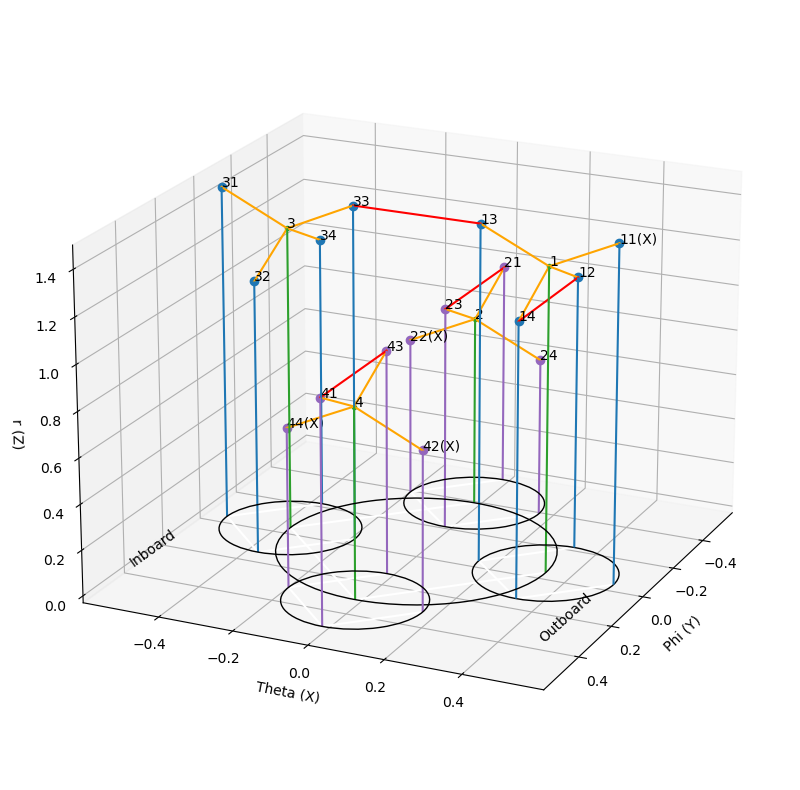

In [2]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'),figsize=(10,10))

Z0=0       #Probe height (depth)
a=0.180    #Single tetra edge half-length
s=0.350    #Full probe edge half-length
Lf=1.000   #Long finger stalk height
Sf=0.505   #Short finger stalk height
Ts=0.331   #Tetra shield half height
Zt=0.139   #Mach tip Z displacement from Ts
angle=0   #Rotation Angle

theta=np.radians(-angle)
rotMat=np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])

x0=np.array([0,s,0,-s])
y0=np.array([s,0,-s,0])
z0=np.array([Lf+Ts,Sf+Ts,Lf+Ts,Sf+Ts])
#z0=Z0+np.array([(s/np.sqrt(2)),(-s/np.sqrt(2)),(s/np.sqrt(2)),(-s/np.sqrt(2))])
P0=np.dot(rotMat,np.array([x0,y0,z0]))
x0=P0[0]
y0=P0[1]
z0=P0[2]
ax.stem(x0, y0, z0, basefmt='w', markerfmt='C2.', linefmt='C2-')

x1=np.array([0,a,0,-a])
y1=np.array([a,0,-a,0])
z1=np.array([Zt,-Zt,Zt,-Zt])
#z1=np.array([(a/np.sqrt(2)),(-a/np.sqrt(2)),(a/np.sqrt(2)),(-a/np.sqrt(2))])
P1=np.dot(rotMat,np.array([x1,y1,z1]))
x1=x0[0]+P1[0]
y1=y0[0]+P1[1]
z1=z0[0]+P1[2]
ax.stem(x1, y1, z1, basefmt='w')

x2=np.array([0,a,0,-a])
y2=np.array([a,0,-a,0])
z2=np.array([-Zt,Zt,-Zt,Zt])
#z2=np.array([(-a/np.sqrt(2)),(a/np.sqrt(2)),(-a/np.sqrt(2)),(a/np.sqrt(2))])
P2=np.dot(rotMat,np.array([x2,y2,z2]))
x2=x0[1]+P2[0]
y2=y0[1]+P2[1]
z2=z0[1]+P2[2]
ax.stem(x2, y2, z2, basefmt='w', markerfmt='C4o', linefmt='C4-')

x3=np.array([0,a,0,-a])
y3=np.array([a,0,-a,0])
z3=np.array([Zt,-Zt,Zt,-Zt])
#z3=np.array([(a/np.sqrt(2)),(-a/np.sqrt(2)),(a/np.sqrt(2)),(-a/np.sqrt(2))])
P3=np.dot(rotMat,np.array([x3,y3,z3]))
x3=x0[2]+P3[0]
y3=y0[2]+P3[1]
z3=z0[2]+P3[2]
ax.stem(x3, y3, z3, basefmt='w')

x4=np.array([0,a,0,-a])
y4=np.array([a,0,-a,0])
z4=np.array([-Zt,Zt,-Zt,Zt])
#z4=np.array([(-a/np.sqrt(2)),(a/np.sqrt(2)),(-a/np.sqrt(2)),(a/np.sqrt(2))])
P4=np.dot(rotMat,np.array([x4,y4,z4]))
x4=x0[3]+P4[0]
y4=y0[3]+P4[1]
z4=z0[3]+P4[2]
ax.stem(x4, y4, z4, basefmt='w', markerfmt='C4o', linefmt='C4-')

for i in range(4):
    ax.plot([x0[0],x1[i]],[y0[0],y1[i]],[z0[0],z1[i]],color='orange')
    
for i in range(4):
    ax.plot([x0[1],x2[i]],[y0[1],y2[i]],[z0[1],z2[i]],color='orange')
    
for i in range(4):
    ax.plot([x0[2],x3[i]],[y0[2],y3[i]],[z0[2],z3[i]],color='orange')
    
for i in range(4):
    ax.plot([x0[3],x4[i]],[y0[3],y4[i]],[z0[3],z4[i]],color='orange')
    
C0 = Circle((0, 0), s, fill=False, color='black')
C1 = Circle((x0[0], y0[0]), a, fill=False, color='black')
C2 = Circle((x0[1], y0[1]), a, fill=False, color='black')
C3 = Circle((x0[2], y0[2]), a, fill=False, color='black')
C4 = Circle((x0[3], y0[3]), a, fill=False, color='black')
ax.add_patch(C0)
ax.add_patch(C1)
ax.add_patch(C2)
ax.add_patch(C3)
ax.add_patch(C4)
art3d.pathpatch_2d_to_3d(C0, z=0, zdir="z")
art3d.pathpatch_2d_to_3d(C1, z=0, zdir="z")
art3d.pathpatch_2d_to_3d(C2, z=0, zdir="z")
art3d.pathpatch_2d_to_3d(C3, z=0, zdir="z")
art3d.pathpatch_2d_to_3d(C4, z=0, zdir="z")

ax.text(x0[0],y0[0],z0[0],'1')
ax.text(x0[1],y0[1],z0[1],'4')
ax.text(x0[2],y0[2],z0[2],'3')
ax.text(x0[3],y0[3],z0[3],'2')

ax.text(x1[0],y1[0],z1[0],'11(X)')
ax.text(x1[1],y1[1],z1[1],'14')
ax.text(x1[2],y1[2],z1[2],'13')
ax.text(x1[3],y1[3],z1[3],'12')

ax.text(x2[0],y2[0],z2[0],'42(X)')
ax.text(x2[1],y2[1],z2[1],'41')
ax.text(x2[2],y2[2],z2[2],'44(X)')
ax.text(x2[3],y2[3],z2[3],'43')

ax.text(x3[0],y3[0],z3[0],'33')
ax.text(x3[1],y3[1],z3[1],'32')
ax.text(x3[2],y3[2],z3[2],'31')
ax.text(x3[3],y3[3],z3[3],'34')

ax.text(x4[0],y4[0],z4[0],'24')
ax.text(x4[1],y4[1],z4[1],'23')
ax.text(x4[2],y4[2],z4[2],'22(X)')
ax.text(x4[3],y4[3],z4[3],'21')

#ax.plot([x1[1],x3[1]],[y1[1],y3[1]],[z1[1],z3[1]],color='red') #14 to 32
ax.plot([x2[1],x2[3]],[y2[1],y2[3]],[z2[1],z2[3]],color='red') #41 to 44

#ax.plot([x1[3],x3[3]],[y1[3],y3[3]],[z1[3],z3[3]],color='red') #12 to 34
ax.plot([x4[1],x4[3]],[y4[1],y4[3]],[z4[1],z4[3]],color='red') #21 to 23

ax.plot([x1[2],x3[0]],[y1[2],y3[0]],[z1[2],z3[0]],color='red') #13 to 33
#ax.plot([x4[1],x2[3]],[y4[1],y2[3]],[z4[1],z2[3]],color='red') #23 to 43

ax.plot([x1[3],x1[1]],[y1[3],y1[1]],[z1[3],z1[1]],color='red') #12 to 14

ax.text(0.4,-0.6,0,'Inboard',zdir='x')
ax.text(0.4,0.5,0,'Outboard',zdir='x')
ax.set_xlabel('Phi (Y)')
ax.set_ylabel('Theta (X)')
ax.set_zlabel('r (Z)')
ax.view_init(20,25,'z')

print('Rotation = {} degrees'.format(angle))